In [1]:
import numpy as np

In [2]:
x = np.array([[1,2],[3,4],[5,6]])

In [3]:
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
y = x[[0,1,2],[0,1,0]]

In [5]:
y

array([1, 4, 5])

^ I don't understand this

In [1]:
import keras

/home/mathlizard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.2'

In [3]:
from keras.datasets import mnist

In [11]:
from keras import models, layers


468.75

In [10]:
model = models.Sequential()  # take a couple of layers and stack them
model.add(layers.Dense(   #the 784 inputs then simplify to 512 outputs
512,
activation="relu",   #ensures proper nodes are activated
input_shape=(28*28,)))  #defining the input shape, ONLY THE FIRST LAYER HAS A DETERMINED INPUT SHAPE
model.add(layers.Dense(
    10,
    activation="softmax")) #it has 10 outputs, and its input is from the last layer
#softmax is a threshold function, activation threhold, makes sure some outputs propogate and others don't propogate
#makes sure the sum of all outputs is 1, and each output is in between 0 and 1 --> becomes a probability distribution
model.summary() 

model.compile(           #you can't train a neural network until it's been compiled, 
optimizer="rmsprop",     #rmsprop is an algorithm changes the learning rate over time, always a good start
loss="categorical_crossentropy",   #tells you how big your error is, how far away from the predicted result from expected
metrics=["accuracy"])#cross entropy == distances between probability distributions, categorical means more than two classes 
# accuracy tells how many predictions are right and wrong,
# we use accuracy because it's a classifation problem
# accuracy metric is easily to interpret

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


401920 = (28 \* 28) * (512+1)

* this is a dense model, i.e. fully connected, which  means fixed input and output size
* the dense layers are directed and WEIGHTED
* neural networks are a directed graph
* the hidden layer, which has 512 inputs, are hyperparameters
* why relu? relu is fast, always good start
* why softmax? because it's a classification problem
* loss (in this case categorical_crossentropy) can be hard to intrepet
* in classification, with more htan 2 classes, you are obliged to use last layer as softmax, and the category crossentropy as loss function. 



In [26]:
%matplotlib inline
import matplotlib.pyplot as plt 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train:", train_images.shape)
print("Test:", test_images.shape)

# plt.imshow(train_images[0],cmap="gray")
# plt.title(str(train_labels[0]))
# plt.show()
#the original input has numbers that are between 0 and 255
#feed neural networks with numbers that range between 0 and 1, or -1 and 1
# big numbers mean the gradient might explode

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255.0   #normalizing the data

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255.0

from keras.utils import to_categorical

print("before:", train_labels[0])

train_labels = to_categorical(train_labels)   #one-hot encoding
test_labels = to_categorical(test_labels)
print('after:', train_labels[0])

#60,000 = number of samples
#28 by 28 gives you the dimensionality

Train: (60000, 28, 28)
Test: (10000, 28, 28)
before: 5
after: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
model.evaluate(train_images, train_labels)  #the young neural network without training
#model.evaluate: do this once, after the training

60000/60000 [==============================] - 2s 40us/step


[2.42385237197876, 0.06398333333333334]

In [32]:
#model.predict(train_images[0])  #assumes an array of images, this doesn't work. 
import numpy as np
model.predict(train_images[0:1])#hence it has to be two dimensional
print(np.max(model.predict(train_images[0:1])))
print(np.argmax(model.predict(train_images[0:1])))
print(train_labels[0])
#this is an untrained neural network, this is bad

0.18376057
2
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [35]:
history = model.fit(  #it contains a history dictionry, history.history
train_images, train_labels, 
epochs=5,     
batch_size=128)  #BATCH SIZE MUST BE power of 2
#number of epochs is determined how big your training data is
#re-running these lines of code does not reset the weights, it will use the previous weights of the 5th epoch

Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0087 - acc: 0.9977
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0066 - acc: 0.9983
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0054 - acc: 0.9984
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0044 - acc: 0.9989
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0035 - acc: 0.9992


{'loss': [0.008718088429669538, 0.0066080134426864485, 0.005429069279848288, 0.004357031332996363, 0.0035246181110463416], 'acc': [0.9977166666666667, 0.9982833333333333, 0.99845, 0.9988833333333333, 0.9991833333015442]}


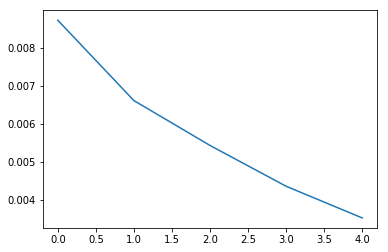

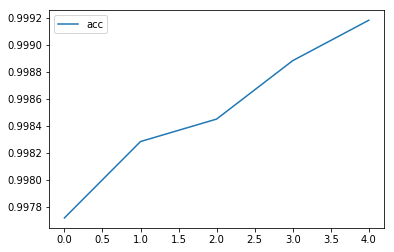

In [39]:
print(history.history)

plt.plot(history.history['loss'])
plt.show()
plt.close()

plt.plot(history.history['acc'], label='acc')
plt.legend()
plt.show()
plt.close()

In [8]:
test_loss, test_acc = model.evaluate(train_images, train_labels)  #why do we have test data?  to avoid overfitting
print(test_loss, test_acc)

60000/60000 [==============================] - 3s 42us/step
0.023233640158587757 0.9936833333333334


* optimizing vs generalizing 
* we optimize on the training data, and we generalize on the testing data (something it hasn't seen yet)
* we need to apply the testing data to avoid overfitting

*  big words: AI, ML, DL
*  there's a big difference between AI and ML --> not true!  
*  Agent-based AI 
*  DL was used to win the game of GO
* given the input and output, find the rules (the function that fits)
* Artificial Neural Networks (ANN)/ DL 
*  AI is the superset --> ML (subset of AI) --> ANN/DL (subset of ML)
* DL is different from ANN because 
* AI Winter --> cut down funding
* in the past, neural networks were rejected
* ANN (1943) --> DL (2007-2010) the name was changed to improve its stigma
* GPU ( a specialized derivation of CPU for graphics) --> lots of matrix computations, they perform the matrix computations in parallel
* 2010, time it was proved that GPU's were great for neural networks
* after this, there was a ML competition --> imagenet was created 
* convolutional neural networks --> special kind of layers and believed that would work really well with images--> scientist used it --> 83% accuracy, as opposed to traditional ML techniques (73% accuracy)
* ML =some programming (feature engineering) + brain (function that maps the relevant features)
* DL = just brain (data structure + function that maps the data)
* data science is used as a tool to apply DL
* Keras is built on top of Tensorflow
* tensorflow is a data flow library provided 
* the repeated data flow process is what a neural network is
* data flow:  Input1 |   input 2   --> operation (+) --> 1 output
